In [2]:
from keras import layers , models

Using TensorFlow backend.


In [37]:
class AE(models.Model):
    def __init__(self,x_nodes,z_dim):
        x_shape = (x_nodes,)
        x = layers.Input(shape=x_shape)
        z = layers.Dense(z_dim,activation='relu')(x)
        y = layers.Dense(x_nodes,activation='sigmoid')(z)
        super().__init__(x,y)        
        self.x = x;
        self.z = z;
        self.z_dim = z_dim
        self.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])
    
    def Encoder(self):
        return models.Model(self.x,self.z)
    
    def Decoder(self):
        z_shape =(self.z_dim,)
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z,y)

In [29]:
from keras.datasets import mnist

In [30]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train  = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [31]:
x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test),-1))

In [32]:
x_nodes = 784
z_dim =36
autoencoder = AE(x_nodes, z_dim)
history = autoencoder.fit(x_train,x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle =True,
                          validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.3507 - acc: 0.7587 - val_loss: 0.2696 - val_acc: 0.7958
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2609 - acc: 0.7981 - val_loss: 0.2486 - val_acc: 0.7989
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2383 - acc: 0.7977 - val_loss: 0.2263 - val_acc: 0.7960
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2191 - acc: 0.7976 - val_loss: 0.2095 - val_acc: 0.7978
Epoch 5/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.2044 - acc: 0.7990 - val_loss: 0.1967 - val_acc: 0.7994
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1931 - acc: 0.8005 - val_loss: 0.1867 - val_acc: 0.8006
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1841 - acc: 0.8018 - val_loss: 0.1788 - val_acc

In [33]:
from skeras import plot_loss ,plot_acc

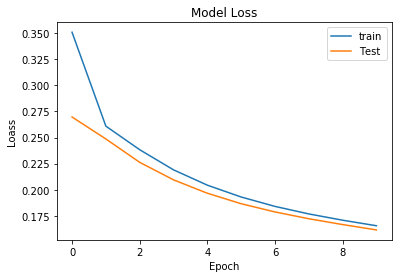

In [34]:
plot_loss(history)

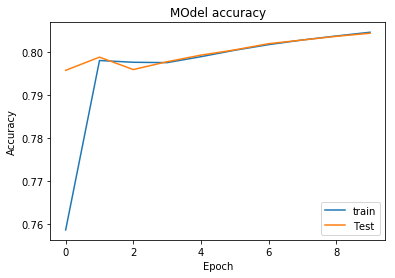

In [35]:
plot_acc(history)

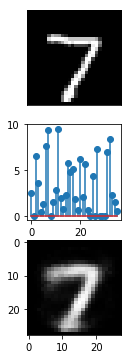

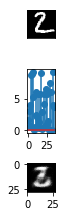

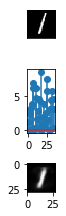

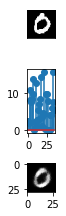

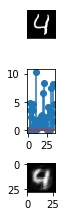

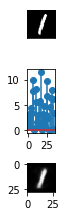

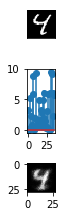

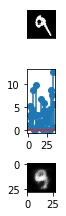

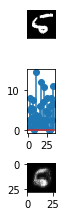

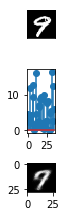

In [41]:
import matplotlib.pyplot as plt

encoder = autoencoder.Encoder()
decoder = autoencoder.Decoder()

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)



n = 10
plt.figure(figsize=(20,6))

for i in range(n):
    ax = plt.subplot(3,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3,n,i+1+n)
    plt.stem(encoded_imgs[i].reshape(-1))
    ax = plt.subplot(3,n,i+1+n+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.show()